In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I conducted this data analysis to uncover valuable insights into the field of Data-related jobs. My primary focus was to identify the most sought-after skills in the industry, shedding light on what attributes make a candidate highly desirable. Additionally, I aimed to determine the skills that command the highest compensation from employers. Finally, I wanted to understand the prevalence of applications for senior positions within the dataset, providing a comprehensive overview of the job landscape in the Data domain.

In [2]:
df = pd.read_csv(r'C:/Users/ADMIN/Folder with projects/Cleanded_DS.csv')
del df['Unnamed: 0']
df.head(3) 

,Job_Title,Min_Salary,Max_Salary,Avg_Salary,Job_Description,Rating,Company_Name,City,State,Headquarters,...,Title,seniority,python,sql,excel,tableau,power bi,aws,spark,azure
0,Sr Data Scientist,137000,171000,154000,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,New York,NY,"New York, NY",...,data scientist,NaN,NaN,NaN,NaN,NaN,NaN,aws,NaN,azure
1,Data Scientist,137000,171000,154000,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,Chantilly,VA,"Herndon, VA",...,data scientist,NaN,NaN,sql,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Scientist,137000,171000,154000,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,Boston,MA,"Boston, MA",...,data scientist,NaN,python,NaN,excel,NaN,NaN,aws,NaN,NaN


Here we can see a brief overview of our data, like number of unique values, top values and their frequency. After exploring this overview we can see that we have 537 rows and different number of frequency for skills and seniority. Also I have different objectives but from this overview we can even see state and city with the highest number of opportunities, etc.

In [3]:
df.describe(include='object')

,Job_Title,Job_Description,Company_Name,City,State,Headquarters,Size,Type_of_ownership,Industry,Sector,...,Title,seniority,python,sql,excel,tableau,power bi,aws,spark,azure
count,537,537,537,537,517,537,537,537,537,537,...,537,45,416,313,244,112,31,138,159,45
unique,96,401,364,172,37,202,8,11,55,22,...,3,1,1,1,1,1,1,1,1,1
top,Data Scientist,Do you have a head for numbers? Like turning r...,Maxar Technologies,San Francisco,CA,"New York, NY",51 to 200 employees,Company - Private,IT Services,Information Technology,...,data scientist,senior,python,sql,excel,tableau,power bi,aws,spark,azure
freq,326,4,12,54,133,26,118,334,56,161,...,444,45,416,313,244,112,31,138,159,45


Here we can see visualization of skills by popularity. 

Text(0.5, 1.0, 'Skills by popularity')

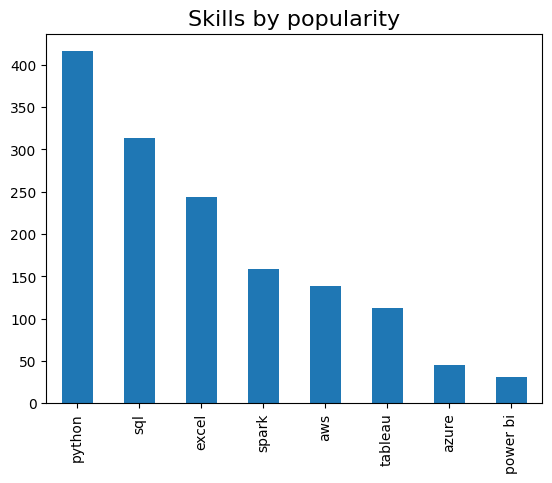

In [4]:
skill_list = ['python','sql', 'excel', 'tableau', 'power bi', 'aws', 'spark', 'azure']
skills_sorted = df[skill_list].count().sort_values(ascending=False)
skills_sorted.plot(kind='bar')
plt.title('Skills by popularity', fontsize=16)

This graph shows us average annual salary per skill. In my opinion difference is really small, only about ~8% between the lowest and highest annual salary. 

Text(0.5, 1.0, 'Average annual salary per skill')

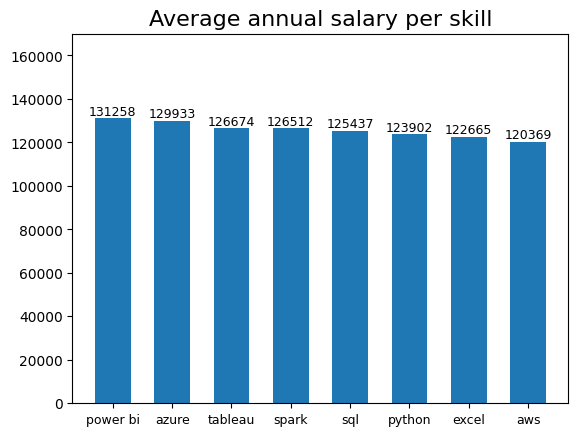

In [5]:
list_jobs = []
for i in skill_list:
    filt = df[i] == i
    avg_sal = df.loc[filt, 'Avg_Salary'].mean().astype('int')
    list_jobs.append({'skill':i, 'avg_salary': avg_sal})

df_skill = pd.DataFrame(list_jobs)
df_skill_sorted = df_skill.sort_values(by='avg_salary',ascending=False)

barplot = plt.bar(x=df_skill_sorted['skill'], height=df_skill_sorted['avg_salary'], width=0.6)
plt.bar_label(barplot,labels=df_skill_sorted['avg_salary'], fontsize=9)
plt.xticks(fontsize=9)
plt.ylim([0, 170000])
plt.title("Average annual salary per skill", fontsize=16)

In [6]:
dss = df.query("Title == 'data scientist' and seniority == 'senior'")['Title'].count()
das = df.query("Title == 'data analyst' and seniority == 'senior'")['Title'].count()
des = df.query("Title == 'data engineer' and seniority == 'senior'")['Title'].count()
ds = df.query("Title == 'data scientist'")['Title'].count()
da = df.query("Title == 'data analyst'")['Title'].count()
de = df.query("Title == 'data engineer'")['Title'].count()

Finally last visualization that shows us ratio between seniors and the number of all data jobs. As we see the number of opportunities for people who don't have level of senior is really high.

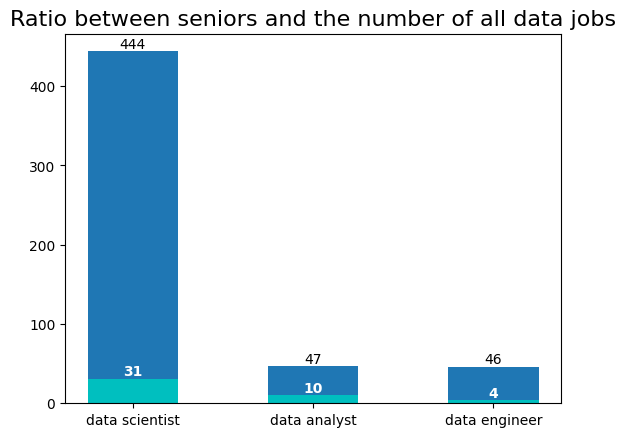

In [7]:
jobs = plt.bar(['data scientist', 'data analyst', 'data engineer'], [ds, da, de], width=-0.5)
jobs_senior = plt.bar(['data scientist', 'data analyst', 'data engineer'], [dss,das,des],width=-0.5,color='c')

plt.bar_label(jobs, labels = [ds, da, de], fontsize=10)
plt.bar_label(jobs_senior, labels = [dss,das,des], fontsize=10, color="white",  fontweight="bold")
plt.title("Ratio between seniors and the number of all data jobs", fontsize=16)
plt.show()

In this data analysis project, my primary objective was to gain valuable insights into the Data-related job market. I aimed to identify the most sought-after skills, emphasizing the attributes that make a candidate highly desirable. Additionally, I sought to determine the skills commanding the highest compensation and understand the prevalence of applications for senior positions, offering a comprehensive overview of the Data job landscape.

The initial data overview revealed 537 rows with varying frequencies of skills and senioritd. Subsequent visualizations depicted skill popularity, average annual salaries per skill, and the ratio of senior to overall job opportunities. Notably, the average annual salary differences among skills were relatively small, approximately 8%.

The visualizations serve as valuable tools for decision-making. By analyzing average annual salaries and skill popularity, individuals can prioritize learning skills that align with industry demand and financial incentobs.